# Neural Network for pricing new products

Many factors affect food prices such as productivity, government policies,etc. These factors affect food prices directly or indirectly- we do not have exact formula for computing prices knowing values of factors, besides, there are many unknown or hidden factors.. Such problem is a good candidate for solution by ML methods.We use data ( prices of different foods with their nutritional content ) to train the model and then use it to assign a price to a new product given isnutritional content.
Such a data is always available , in contrast to data needed for using ML in say predicting bankruptcy of the firm of probability of natural cataclysm.
Let us consider a problem of pricing a new product in food industry. 
We will build and train neural network to perform this task.

Prerequisite for this project: familiarity with diet optimization problem

These are several steps in this task:

1.	Mathematical model.

2.	Data

3.	Neural network construction

4.	Neural network training:

    a.	Algorithm
    b.	Data
    c.	Results
    d.	Interpretation

5.	Conclusion

To remind, the goal of the diet problem is to find the cheapest combination of foods that will satisfy all the daily nutritional requirements of a person. For this problem we used food dataset : each row of data represented one food item, each column represented certain nutrien, such as fat, protein, fiber, etc, and one column had unit prices of food items.
We use the same dataset to train neural network to perform pricing of new product such as energy drink. To test our neural network we price one of popular energy drink products and see if real market proce is close to the price predicted by ANN.


# Scikit learn multi layer perceptron (MLP)

We use multi layer perceptron model from scikit learn (we use perceptron with 2 hidden layers) (sklearn.neural_network.MLP). This is a description of MLP:

MLPRegressor
sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

this is a link to full description in scikit-learn documentatation:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

We create a python script that loads input data from Excel spreadsheet, transforms it to a form suitable for MLPRegressor model, runs MLPRegressor and prints the output



# Python script

we use pandas read_excel function to read input data

In [3]:
import pandas as pd

we use numpy to perform vector and matrix operations 

In [4]:
import numpy as np


In [5]:
from sklearn.neural_network import MLPRegressor

this is a spreadsheet with input data

In [6]:
data_file = 'NutritionFacts.xlsx'

In [7]:
df = pd.read_excel(data_file,header=0,index_col = 0)


In [8]:
df

,Cost,NewCost,Serving Size,Calories,Cholesterol mg,Total_Fat g,Sodium mg,Carbohydrates g,Dietary_Fiber g,Protein g,Vit_A IU,Vit_C IU,Calcium mg,Iron mg
Foods,,,,,,,,,,,,,,
Bagels,0.16,0.80,1 Oz,78.00,0.0,0.50,151.40,15.10,0.6,3.0,0.00,0.00,21.0,1.00
Couscous,0.39,1.95,1/2 Cup,100.80,0.0,0.10,4.50,20.90,1.3,3.4,0.00,0.00,7.2,0.30
"Macaroni,Ckd",0.17,0.85,1/2 Cup,98.70,0.0,0.50,0.70,19.80,0.9,3.3,0.00,0.00,4.9,1.00
"Malt-O-Meal,Choc",0.52,2.60,1 C,607.20,0.0,1.50,16.50,128.20,0.0,17.3,0.00,0.00,23.1,47.20
Peanut Butter,0.07,0.35,2 Tbsp,188.50,0.0,16.00,155.50,6.90,2.1,7.7,0.00,0.00,13.1,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vegetbeef Soup,0.71,3.55,1 C (8 Fl Oz),158.10,10.0,3.80,1915.10,20.40,4.0,11.2,3785.10,4.80,32.6,2.20
Splt Pea&Hamsoup,0.67,3.35,1 C (8 Fl Oz),184.80,7.2,4.00,964.80,26.80,4.1,11.1,4872.00,7.00,33.6,2.10
Frozen Broccoli,0.16,0.80,10 Oz Pkg,73.80,0.0,0.80,68.20,13.60,8.5,8.0,5867.40,160.20,159.0,2.30


In [9]:
y = np.asarray(df['NewCost'])


In [10]:
y

array([0.8 , 1.95, 0.85, 2.6 , 0.35, 0.3 , 0.6 , 0.25, 0.3 , 0.4 , 1.65,
       0.75, 1.35, 0.75, 1.55, 0.45, 4.05, 3.75, 1.6 , 0.8 , 4.1 , 1.55,
       0.2 , 2.25, 0.2 , 0.95, 1.1 , 0.1 , 3.45, 1.2 , 4.2 , 0.75, 1.55,
       0.15, 0.9 , 4.15, 2.45, 0.25, 3.25, 4.95, 0.75, 2.2 , 1.25, 0.8 ,
       0.4 , 0.55, 2.65, 0.65, 1.15, 1.35, 2.95, 3.35, 1.7 , 1.4 , 1.4 ,
       1.6 , 1.9 , 1.95, 1.95, 3.9 , 3.55, 3.35, 0.8 , 0.35, 0.8 ])

In [11]:
X = df.drop(['Cost','Serving Size','NewCost'],axis=1)



In [12]:
X.head(20)
X.shape[0]

65

In [13]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clfit= clf.fit(X, y)

After training our ANN it can predict prices of new products. For example.
For example, what is a price of the following drink:
    [80.0,0.0,0.5,151.4,15.1,0.6,3.0,0.0,0.0,21.0,1.0]

In [14]:
new_drink =np.array([80.0,0.0,0.5,151.4,15.1,0.6,3.0,0.0,0.0,21.0,1.0])
res = clfit.predict(new_drink.reshape(1, -1))

C:\Users\dmitr\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [15]:
res

array([1.62307687])

# ANN from scratch

Neural network which consists of one neuron, input and output, and identity activation function:


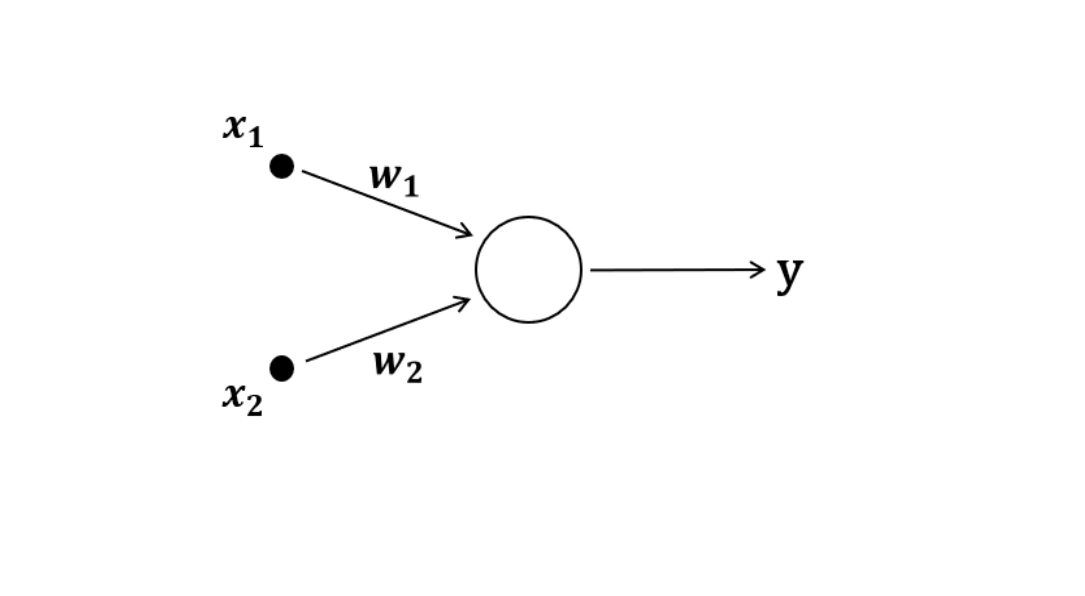

It may be represented as function as $\sum_{i=1}^m{w_{i} x_i}=y$

where x is input signal, w is weight of the signal x, and y is the output signal


A one - neuron ANN with activation  $\phi$ is $\phi{(\sum_{i=1}^m{w_{i} x_i})}=y$

Two - layer ANN with identity activation:

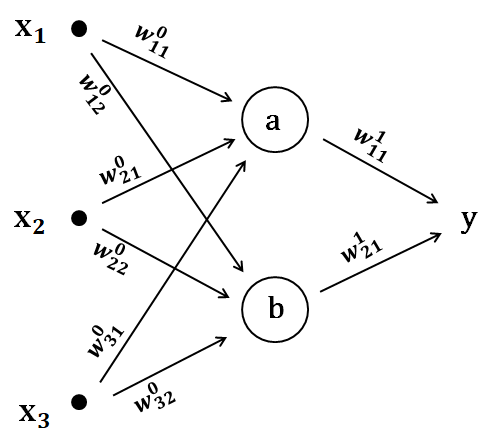

The above ANN may be represented as function: $\sum_{j=1}^k{\sum_{i=1}^m{w_{ij}^{1}w_{j1}^{2}  x_i}}=y$

with activation $\phi$ it becomes: $\phi{(\sum_{j=1}^k w_{j1}^{2} {\phi{(\sum_{i=1}^m{w_{ij}^{1}  x_i}}}))}=y$

In the above notations: m is number of features, n is number of neurons in hidden layer, W is matrix of weights of input signals

We take sum of squares as objective when fitting our ANN model to given data:

$$f=\sum_{i=1}^n{(y_{i} - y( x^i))^2}$$

where $(x^i,y_{i})$ is i-th observation from  a given sample of n observations, $x^i ={(x_1^i,x_2^i,..,x_m^i)}$


# Python code 

Define two functions: a function that represents ANN and and a function that represents fitting criterion $f$                                                                            

In [16]:
def perceptron(w,xx):
    s = 0
    m = xx.shape[0]
    nn = w.shape[0]
    k = int(nn/(2*m))
    for j in range(k):
        for i in range(m):
            s += xx.iloc[i]*w[i*(j+1)]*w[nn-j-1]
    return s
#sum of suares objective f
def sumsquares(w,f,x,y):
    """
    f - function to fit
    X, y - observations
    """
    s=0
    n = x.shape[0]
    for i in range(n):
        #s += 1+y[i]+x[i]
        s += abs(y[i]-f(w,x.iloc[i]))
    return np.sqrt(s)  

In [17]:
#optimize sumsquares using Nelder and Mead algorithm from scipy.optimize
from scipy.optimize import fmin
n = X.shape[0]
m = X.shape[1]

#k - number of neurons in the hidden layer. 
k = 2
#w - weights of ANN
w0 =np.random.rand(m*k*2)
print(perceptron(w0,X.iloc[0]))
print(sumsquares(w0,perceptron,X,y))
#res = fmin(sumsquares,w0,args=(perceptron,X,y,))


101.34236632498427
153.68518147952986


# Optimization problem from scratch

Next we consider algorithms for optimizing $f$, and use building blocks from minpy to implement them. 
We start with method of sliding tolerance 

# Method of sliding tolerance


This method is an improvement of Nelder and Mead algorithm.

Among its advantages are fewer function evaluations

more information on this algorithm can be found here:

https://studfile.net/preview/2140346/page:34/
also look at diploma of Ozhigin K.V, 2019, SPetersburg University


We introduce the terminology and steps of the algorithm:


1. Generate the sequence of points using Nelder and Mead strategy